# Flower GAN
GAN for generating images of flowers

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
import matplotlib.pyplot as plt
from keras import layers
import time

Setup kaggle environment

In [5]:
from google.colab import drive

# Setup API token
drive.mount("/content/gdrive")
!mkdir ~/.kaggle
!cp gdrive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle
!pip install kaggle

Mounted at /content/gdrive


In [6]:
# Download dataset
!kaggle datasets download -d l3llff/flowers

 94% 215M/228M [00:10<00:00, 19.4MB/s]
100% 228M/228M [00:10<00:00, 22.7MB/s]


In [7]:
# Unzip dataset
!unzip flowers.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/magnolia/2090666304_0ff8463c5f_c.jpg  
  inflating: flowers/magnolia/20914736071_ede33a230a_c.jpg  
  inflating: flowers/magnolia/2126107417_92101f8b5f_c.jpg  
  inflating: flowers/magnolia/21500695820_bc9f753d79_c.jpg  
  inflating: flowers/magnolia/21986337916_36d1c95e64_c.jpg  
  inflating: flowers/magnolia/2294580412_50846f9130_c.jpg  
  inflating: flowers/magnolia/2300805045_982fa1bdf2_c.jpg  
  inflating: flowers/magnolia/2306786428_99f92b0d9c_c.jpg  
  inflating: flowers/magnolia/2324281515_c0269d5963_c.jpg  
  inflating: flowers/magnolia/2325102200_1cb9d8cabc_c.jpg  
  inflating: flowers/magnolia/2325102996_5f1e3bf13a_c.jpg  
  inflating: flowers/magnolia/2325370643_f452e88ace_c.jpg  
  inflating: flowers/magnolia/2334886646_c4c8ee532e_c.jpg  
  inflating: flowers/magnolia/23422365843_3b4b928a4a_c.jpg  
  inflating: flowers/magnolia/2365264040_1ff8f1fed3_c.jpg  
  inflating: flowers/magnolia/23678831170_c9b

In [3]:
BUFFER_SIZE = 16000
BATCH_SIZE = 32

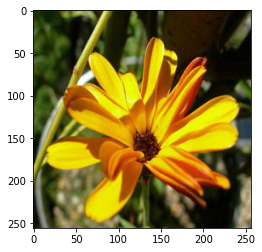

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("flowers/calendula/1010982154_242fbe2cb0_c.jpg")
imgplot = plt.imshow(img)
plt.show()

In [9]:
IMG_SIZE = [128, 128, 3]
NUM_CLASSES = 16

In [10]:
# Load dataset
flowers_dataset = tf.keras.utils.image_dataset_from_directory(
    "flowers",
    labels=None,                          # No labels required for this
    image_size=[IMG_SIZE[0], IMG_SIZE[1]] # Resize the image
)

Found 15740 files belonging to 1 classes.


In [ ]:
#model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [37]:
# Make generator network
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8192, use_bias=False, input_shape=(NUM_CLASSES,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((4, 4, 512)))
    assert model.output_shape == (None, 4, 4, 512)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 8, 8, 512)
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 8, 8, 512)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 16, 16, 512)
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 16, 16, 512)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 32, 32, 512)
    model.add(layers.Conv2DTranspose(256, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(256, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(256, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 32, 32, 256)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 64, 64, 256)
    model.add(layers.Conv2DTranspose(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 64, 64, 128)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 128, 128, 128)
    model.add(layers.Conv2DTranspose(64, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(3, (3, 3), padding='same', use_bias=False))
    #model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, IMG_SIZE[0], IMG_SIZE[1], IMG_SIZE[2])

    return model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


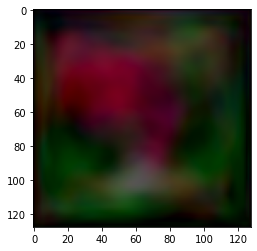

In [39]:
# Test (untrained) generator
generator = make_generator_model()

noise = tf.random.normal([1, NUM_CLASSES])
generated_image = generator(noise, training=False)

plt.imshow((generated_image[0] * 255))

In [13]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              131072    
                                                                 
 re_lu (ReLU)                (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 512)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 512)        0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 512)        2359296   
 nspose)                                                         
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 512)         0

In [45]:
# Make discriminator network
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu", input_shape=IMG_SIZE))
    model.add(layers.Conv2D(64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128*3))
    model.add(layers.Dense(1))

    return model

In [46]:
# Test (untrained) discriminator
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[4.495748e-06]], shape=(1, 1), dtype=float32)


In [47]:
discriminator.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                 

In [48]:
# Loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [18]:
# Discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [19]:
# Generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [20]:
# Separate optimizers, as they don't train simultaneously
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [21]:
# Training loop
EPOCHS = 10
noise_dim = NUM_CLASSES
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [22]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)
      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [23]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    # print("Epoch {}".format(epoch))
    for image_batch in dataset:
      train_step(image_batch)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  generate_and_save_images(generator, epochs, seed)


In [51]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(16, 16))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i] * 255)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


Time for epoch 1 is 88.8314049243927 sec
Time for epoch 2 is 88.8518214225769 sec
Time for epoch 3 is 88.85189390182495 sec
Time for epoch 4 is 88.85497713088989 sec
Time for epoch 5 is 88.84846591949463 sec
Time for epoch 6 is 88.82335543632507 sec
Time for epoch 7 is 88.83736681938171 sec
Time for epoch 8 is 88.83670592308044 sec
Time for epoch 9 is 88.82378768920898 sec
Time for epoch 10 is 88.83321070671082 sec


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

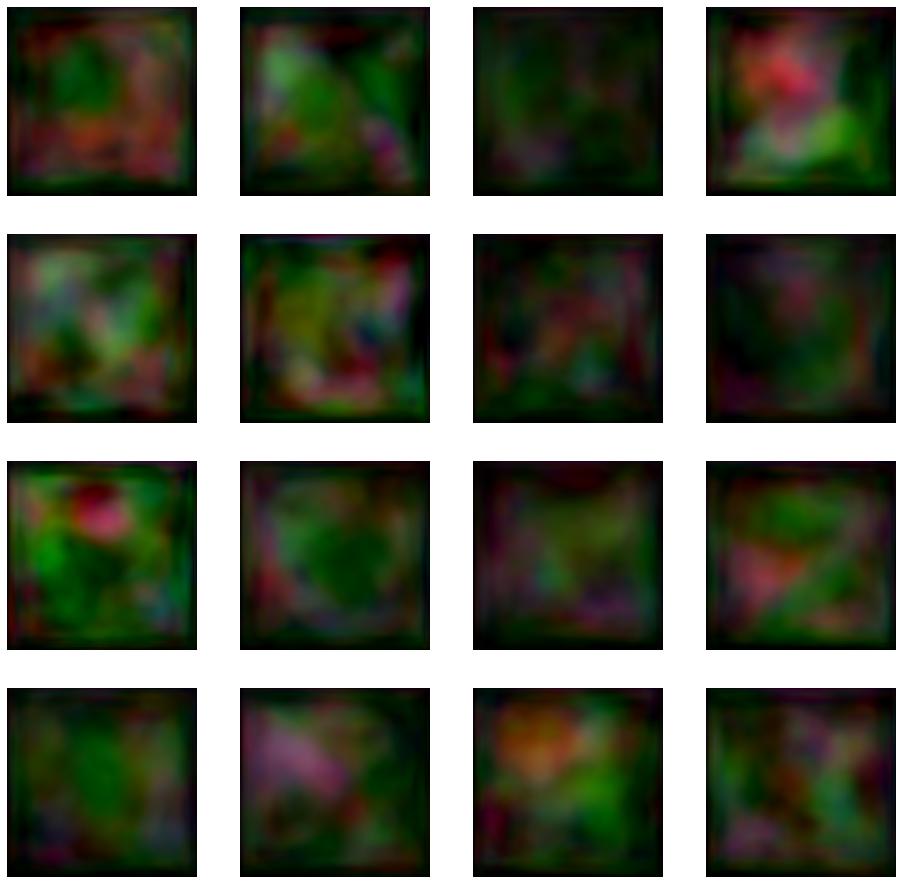

tf.Tensor(
[[ 2.11987754e-05 -6.42896293e-06 -1.23739164e-06]
 [ 7.80004193e-05  4.84047996e-05 -4.90161619e-06]
 [ 9.75580333e-05  1.35394468e-04  3.39731014e-05]
 [ 9.50385001e-05  1.90288774e-04  5.52732527e-05]
 [ 9.81104968e-05  1.77594629e-04  6.28839189e-05]
 [ 8.27975309e-05  1.50697291e-04  8.02479190e-05]
 [ 4.74242406e-05  1.21295707e-04  9.40762111e-05]
 [ 2.55463765e-05  8.89118674e-05  9.41494945e-05]
 [ 1.98040434e-05  6.74908297e-05  9.69064713e-05]
 [ 2.01496005e-05  5.35880026e-05  1.03314349e-04]
 [ 2.10337494e-05  5.07417899e-05  1.11665409e-04]
 [ 2.08652564e-05  5.76724160e-05  1.25506092e-04]
 [ 2.36099222e-05  6.92561516e-05  1.40353630e-04]
 [ 2.51031670e-05  8.08181649e-05  1.58426177e-04]
 [ 2.86287177e-05  8.37732368e-05  1.70111336e-04]
 [ 3.36441153e-05  8.33200320e-05  1.71829655e-04]
 [ 4.01111138e-05  8.03279981e-05  1.63716584e-04]
 [ 4.88647493e-05  7.10756212e-05  1.51751374e-04]
 [ 5.56948762e-05  6.10378993e-05  1.43526267e-04]
 [ 5.93399964e-05  5

In [49]:
# Train
train(flowers_dataset, EPOCHS)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

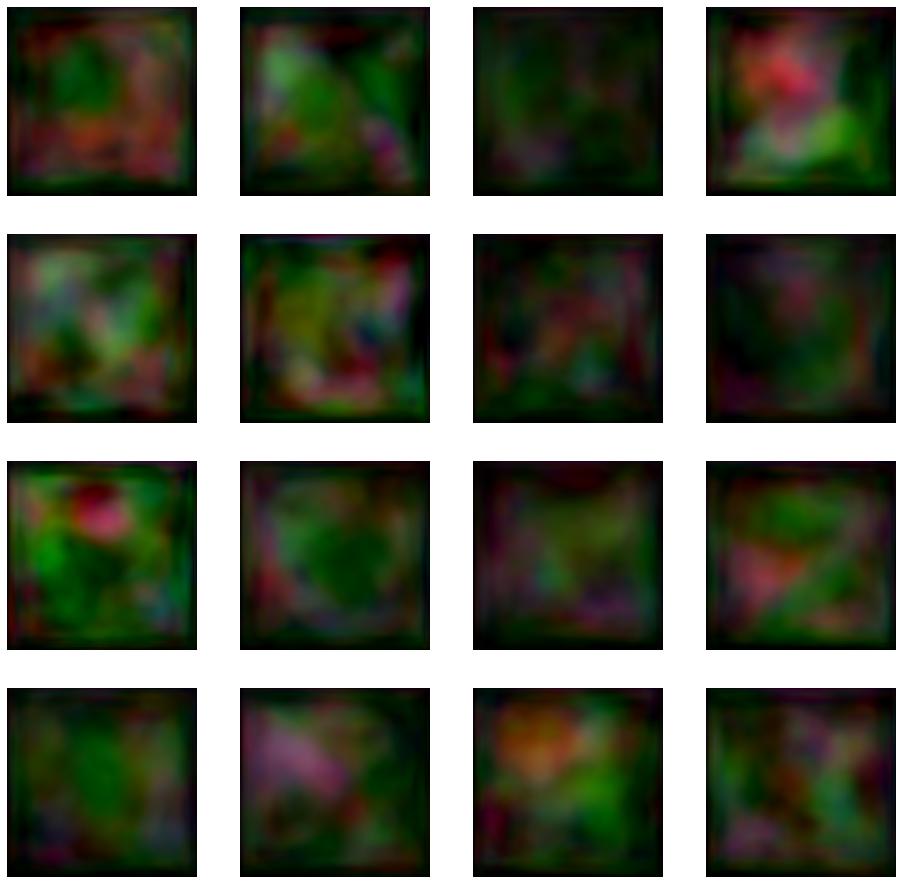

In [52]:
generate_and_save_images(generator, EPOCHS, seed)